#1.Data Vishalization and pre-processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pil
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#2.Load the dataset

In [4]:
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#3.perform below visualization
# 3.1 Uni-Variate Analysis


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

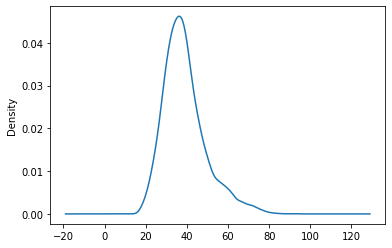

In [8]:
data['Age'].plot(kind='density')

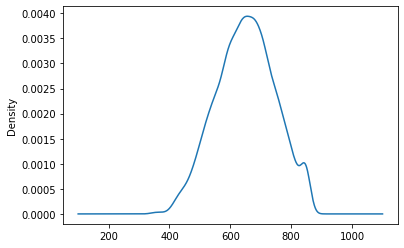

In [9]:
data['CreditScore'].plot(kind='density')

In [14]:
import matplotlib.pyplot as plt


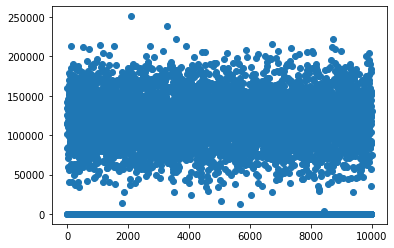

In [15]:
plt.scatter(data.index,data['Balance'])

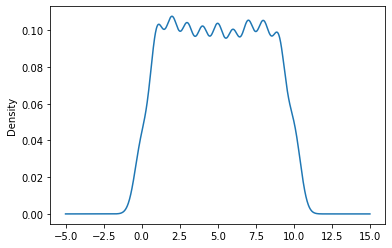

In [16]:
data['Tenure'].plot(kind='density')

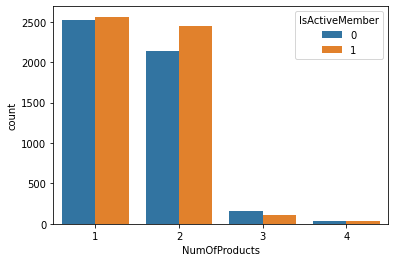

In [17]:
sns.countplot(data=data,x=data['NumOfProducts'],hue='IsActiveMember')

In [18]:
data["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

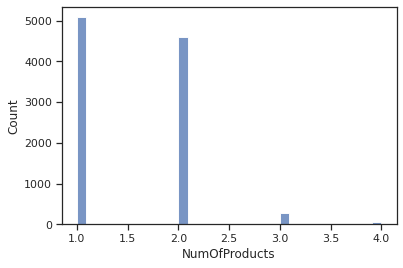

In [19]:
sns.set(style='ticks')
sns.histplot(data.NumOfProducts,kde=False)

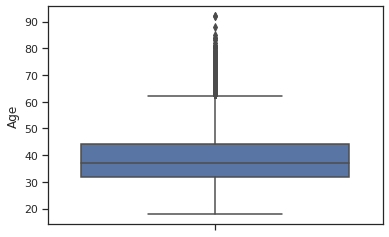

In [20]:
sns.boxplot(y=data['Age'])

#3.2 Bi_Variate Analysis

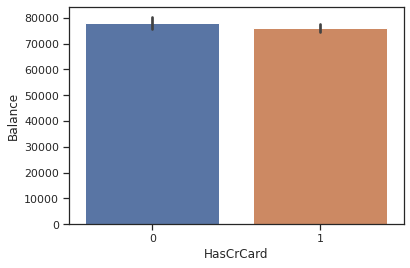

In [21]:
sns.barplot(x='HasCrCard',y='Balance',data=data)

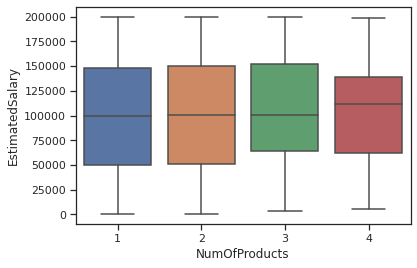

In [22]:
sns.boxplot(x='NumOfProducts',y='EstimatedSalary',data=data)

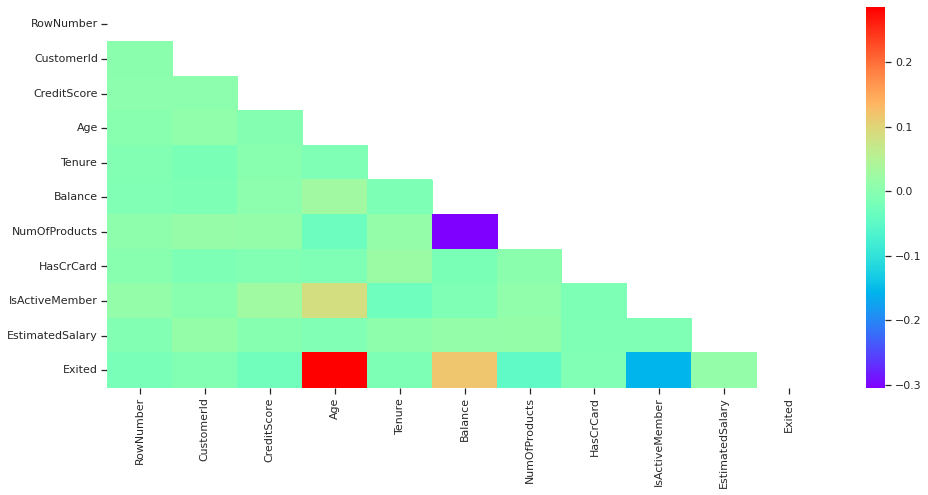

In [24]:
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,7))
sns.heatmap(data.corr(method='pearson'),mask=mask,cmap='rainbow')

#Multi-Variate Analysis

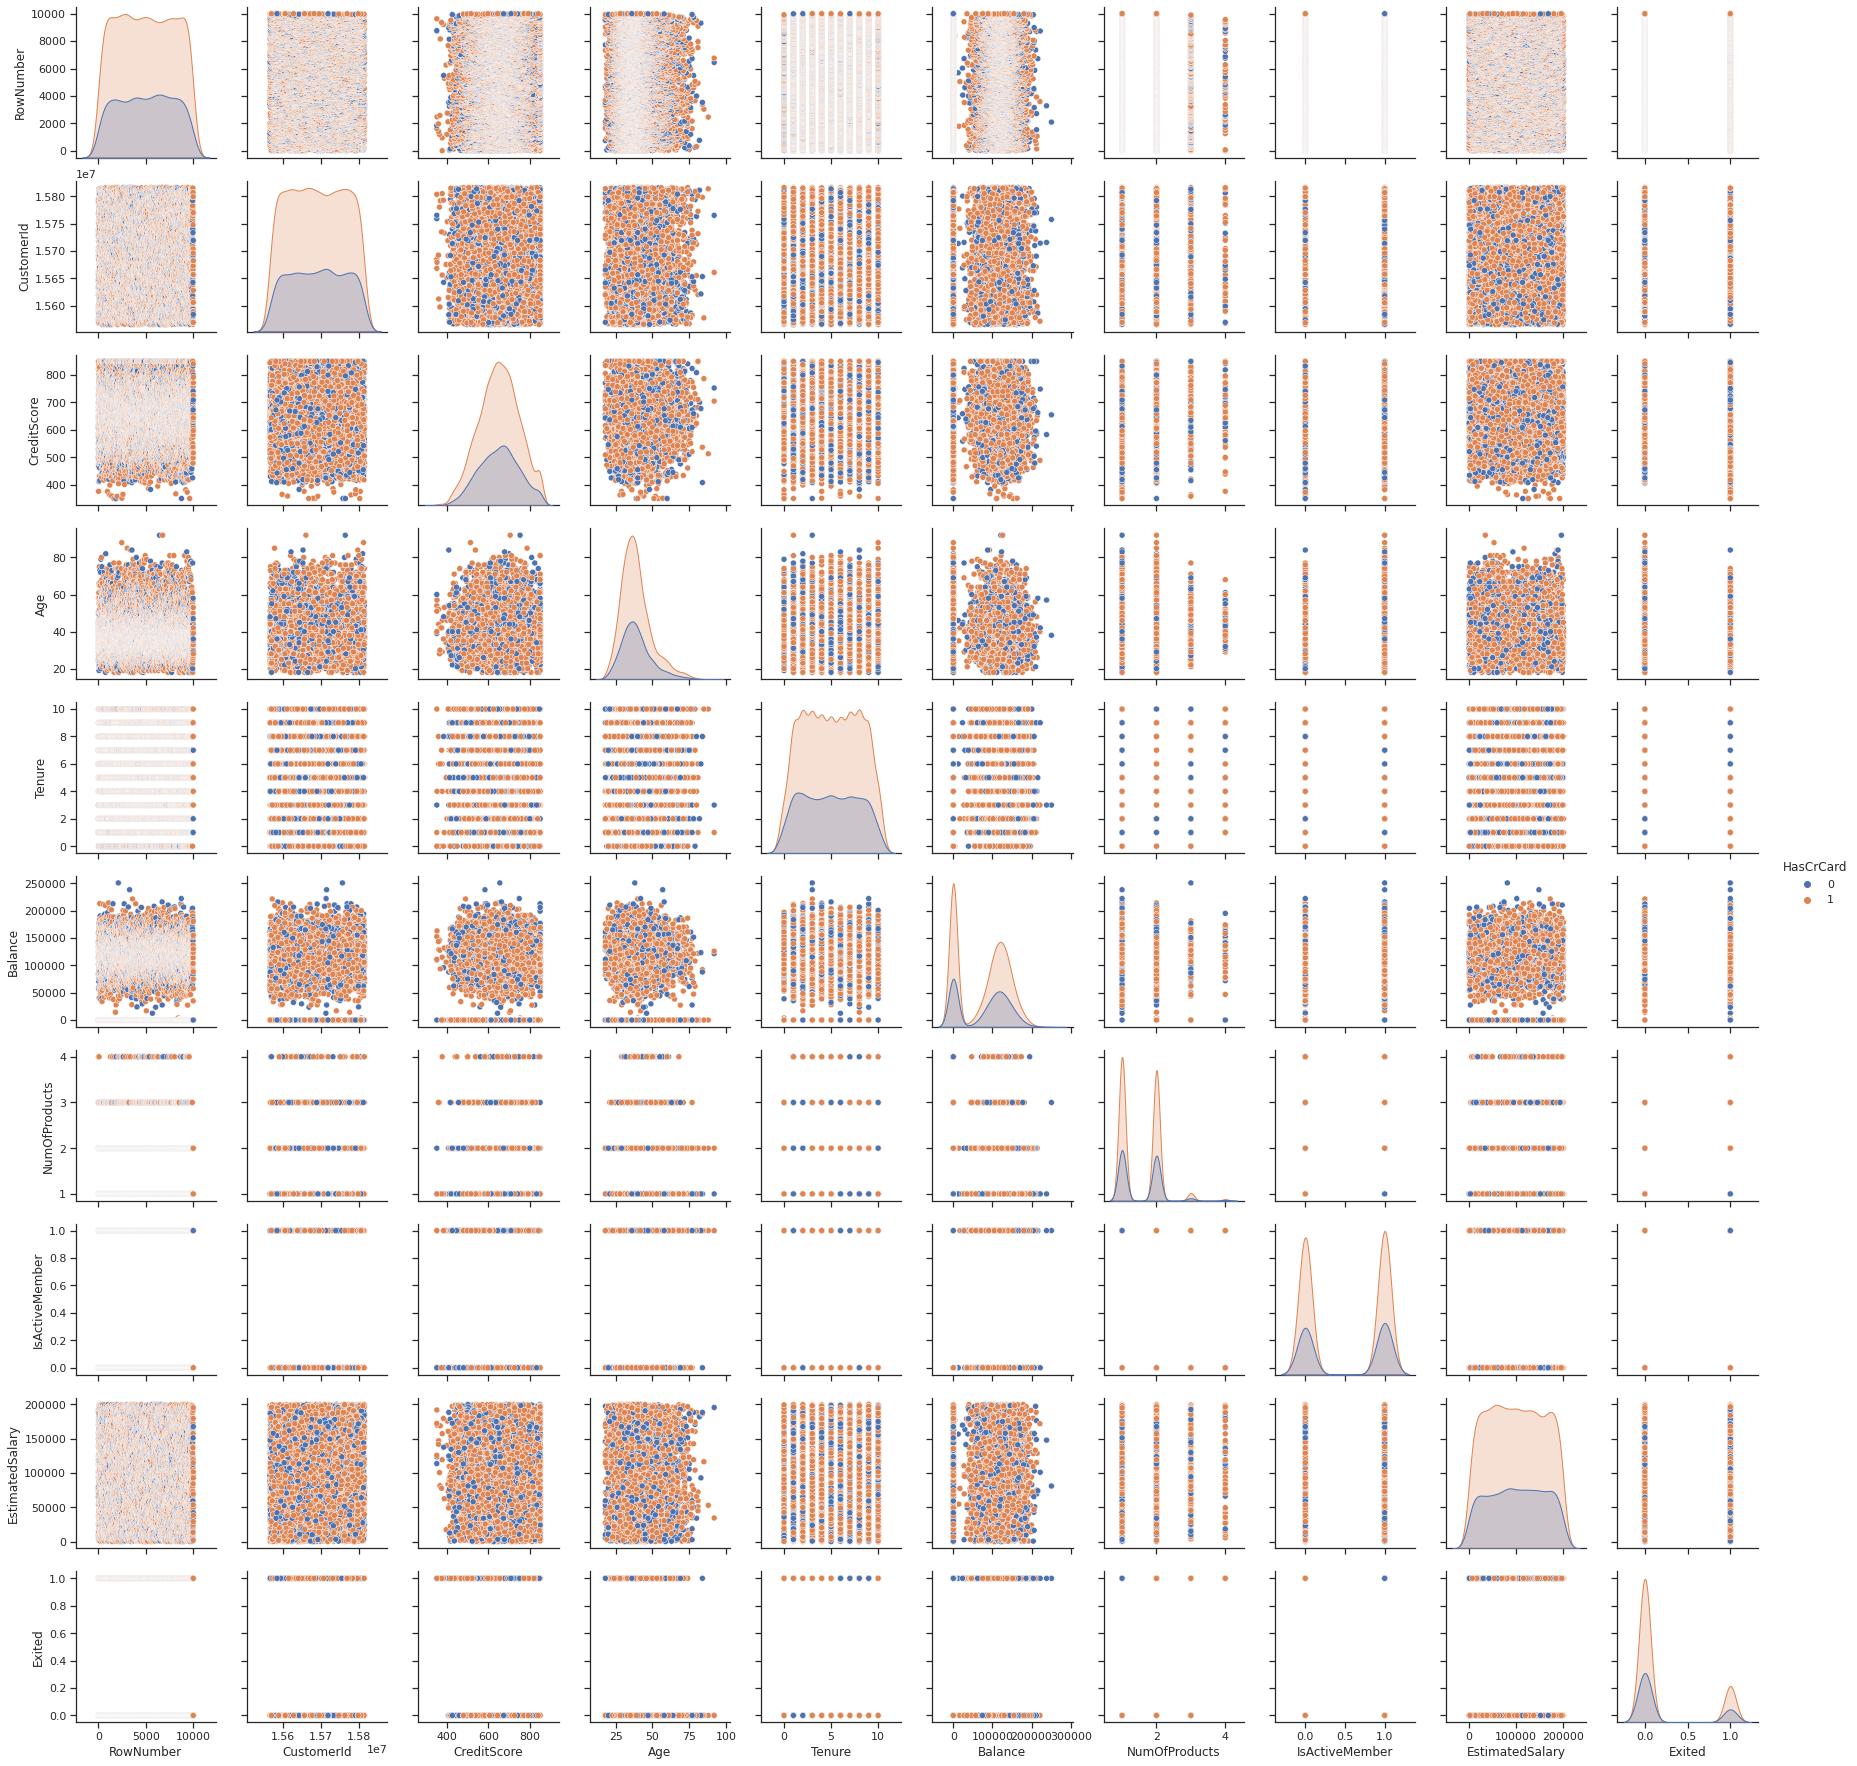

In [25]:
sns.pairplot(data,hue="HasCrCard")

#4 Perform descriptive statistics on the dataset

In [27]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#5 Handle the Missing values

In [29]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#6 Find the outliers and replace the outliers

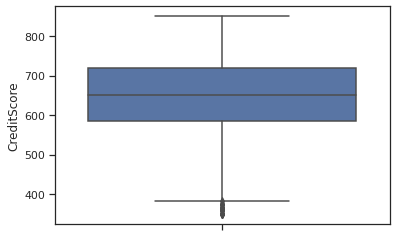

In [30]:
sns.boxplot(y=data['CreditScore'])

In [40]:
q3 = data["CreditScore"].quantile(0.75)
q1=data["CreditScore"].quantile(0.25)
print(q3)
print(q1)
IQR=q3-q1
lower_limit=q1-(IQR*1.5)
print(lower_limit)
upper_limit=q3+(IQR*1.5)
print(upper_limit)
cs_outliers=np.where(data["CreditScore"]>upper_limit,True,
              np.where(data["CreditScore"]<lower_limit,True,False))
without_outliers = data.loc[~(cs_outliers)]

718.0
584.0
383.0
919.0


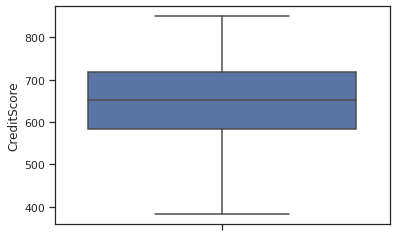

In [41]:
sns.boxplot(y='CreditScore',data=without_outliers)

#7 Check for Categorial columns and perform encoding

In [42]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [43]:
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


#8 Split the data intyo dependent and independent variables

In [44]:
y=data['HasCrCard']
x=data.drop(columns=['HasCrCard','RowNumber','Surname'],axis=1)
print(x)
print(y)

      CustomerId  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0       15634602          619          0       0   42       2       0.00   
1       15647311          608          2       0   41       1   83807.86   
2       15619304          502          0       0   42       8  159660.80   
3       15701354          699          0       0   39       1       0.00   
4       15737888          850          2       0   43       2  125510.82   
...          ...          ...        ...     ...  ...     ...        ...   
9995    15606229          771          0       1   39       5       0.00   
9996    15569892          516          0       1   35      10   57369.61   
9997    15584532          709          0       0   36       7       0.00   
9998    15682355          772          1       1   42       3   75075.31   
9999    15628319          792          0       0   28       4  130142.79   

      NumOfProducts  IsActiveMember  EstimatedSalary  Exited  
0                 1     

#Scale the independent variables


In [45]:
col_names=x.columns
x=scale(x)
x

array([[-0.78321342, -0.32622142, -0.90188624, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-0.60653412, -0.44003595,  1.51506738, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-0.99588476, -1.53679418, -0.90188624, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [-1.47928179,  0.60498839, -0.90188624, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [-0.11935577,  1.25683526,  0.30659057, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [-0.87055909,  1.46377078, -0.90188624, ..., -1.03067011,
        -1.07636976, -0.50577476]])

#10 Split the data into training and testing

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("shape of input training set:",x_train.shape)
print("shape of input testing set:",x_test.shape)
print("shape of output training set:",y_train.shape)
print("shape of output testing set:",y_test.shape)
                                               

shape of input training set: (8000, 11)
shape of input testing set: (2000, 11)
shape of output training set: (8000,)
shape of output testing set: (2000,)
